In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import calendar
import datetime
#Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from xgboost import XGBClassifier
import tensorflow as tf
import keras
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
import imp
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers

import scripts
from scripts.preprocess_text import text_preprocess
from scripts.cnn_model_helper import plot_history,oneHot

c:\Users\parth\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Import comcast telecom complaints data
df = pd.read_csv("data/comcast_consumer_complaints.csv")

In [3]:
df

,Unnamed: 0,author,posted_on,rating,text,complaint_type
0,0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,Internet
1,1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,Customer Service
2,2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,Financial Issues
3,3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,Financial Issues
4,4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,Internet
...,...,...,...,...,...,...
5654,5654,"Brandye of San Ramon, CA","March 12, 2006",0,"Last year, we bought the Nascar In Car package...",Financial Issues
5655,5655,"Paul of Chicago, IL","March 12, 2006",0,Their billing department is horrid. If you dec...,Financial Issues
5656,5656,"Autumn of Knoxville, TN","March 6, 2006",0,"Ordered ""On Demand"" movie for the 1st time in ...",Financial Issues
5657,5657,"Tina of Villa Rica, GA","Feb. 22, 2006",0,I am being ripped of by Comcast Cable regardin...,Customer Service


In [4]:
df['text'] = df['text'].astype(str)

# Preprocess and clean data

In [13]:
df['clean_complaints'] = df['text'].apply(lambda x : text_preprocess(x))
# df['clean_complaints']=df['text'].apply(lambda x : preprocess(x))

In [14]:
df

,Unnamed: 0,author,posted_on,rating,text,complaint_type,clean_complaints
0,0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,Internet,used love comcast constant updates internet ca...
1,1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,Customer Service,i'm comcast ! worst internet provider i'm taki...
2,2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,Financial Issues,could give negative star stars review would ne...
3,3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,Financial Issues,'ve worst experiences far since install nothin...
4,4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,Internet,check contract sign comcast advertised offers ...
...,...,...,...,...,...,...,...
5654,5654,"Brandye of San Ramon, CA","March 12, 2006",0,"Last year, we bought the Nascar In Car package...",Financial Issues,last year bought nascar car package comcast ch...
5655,5655,"Paul of Chicago, IL","March 12, 2006",0,Their billing department is horrid. If you dec...,Financial Issues,billing department horrid decide use comcast (...
5656,5656,"Autumn of Knoxville, TN","March 6, 2006",0,"Ordered ""On Demand"" movie for the 1st time in ...",Financial Issues,ordered demand movie st time nov get bill char...
5657,5657,"Tina of Villa Rica, GA","Feb. 22, 2006",0,I am being ripped of by Comcast Cable regardin...,Customer Service,ripped comcast cable regarding billing expande...


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_complaints'], df['complaint_type'], stratify = df['complaint_type'],test_size=0.20, random_state=200)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [16]:
y_test.unique()

array(['Financial Issues', 'Customer Service', 'Slow internet',
       'Connectivity issues', 'Others', 'Connectivity Issues',
       'Billing Issues', 'Account', 'Internet', 'Network'], dtype=object)

In [17]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
y_val = Encoder.fit_transform(y_val)

In [18]:
df['clean_complaints']

0       used love comcast constant updates internet ca...
1       i'm comcast ! worst internet provider i'm taki...
2       could give negative star stars review would ne...
3       've worst experiences far since install nothin...
4       check contract sign comcast advertised offers ...
                              ...                        
5654    last year bought nascar car package comcast ch...
5655    billing department horrid decide use comcast (...
5656    ordered demand movie st time nov get bill char...
5657    ripped comcast cable regarding billing expande...
5658    comcast services digital tv high speed interne...
Name: clean_complaints, Length: 5659, dtype: object

## Generate vector for text based on the count of the tokens

In [19]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['clean_complaints'])
X_train_vectorized = Tfidf_vect.transform(X_train)
X_test_vectorized = Tfidf_vect.transform(X_test)

In [20]:
# from gensim.models import Word2Vec

# sentences = [df['clean_complaints'] for sentence in X_train]
# w2v_model = Word2Vec(sentences.any(), size=100, window=5, min_count=5, workers=4)

# Naive Bayes classification

In [21]:
cls = GaussianNB()
cls.fit(X_train_vectorized.toarray(), y_train)

GaussianNB(priors=None)

In [22]:
y_pred = cls.predict(X_test_vectorized.toarray())

In [23]:
f'The accuracy score is: {round(accuracy_score(y_test, y_pred)*100, 2)}%'

'The accuracy score is: 31.45%'

In [24]:
classification_report(y_test,y_pred)

'             precision    recall  f1-score   support\n\n          0       0.00      0.00      0.00        16\n          1       0.20      0.05      0.08        42\n          2       0.15      0.20      0.17        55\n          3       0.28      0.34      0.30       191\n          4       0.43      0.32      0.36       433\n          5       0.33      0.49      0.39       264\n          6       0.00      0.00      0.00        10\n          7       0.00      0.00      0.00         5\n          8       0.53      0.13      0.21        60\n          9       0.04      0.05      0.04        56\n\navg / total       0.33      0.31      0.31      1132\n'

# Support Vector Machine classifier

In [25]:
cls = svm.SVC(kernel='rbf')
cls.fit(X_train_vectorized, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
y_pred = cls.predict(X_test_vectorized)

In [27]:
f'The accuracy score is: {round(accuracy_score(y_test, y_pred)*100, 2)}%'

'The accuracy score is: 38.25%'

In [28]:
classification_report(y_test,y_pred)

'             precision    recall  f1-score   support\n\n          0       0.00      0.00      0.00        16\n          1       0.00      0.00      0.00        42\n          2       0.00      0.00      0.00        55\n          3       0.00      0.00      0.00       191\n          4       0.38      1.00      0.55       433\n          5       0.00      0.00      0.00       264\n          6       0.00      0.00      0.00        10\n          7       0.00      0.00      0.00         5\n          8       0.00      0.00      0.00        60\n          9       0.00      0.00      0.00        56\n\navg / total       0.15      0.38      0.21      1132\n'

# Random forest classifier

In [29]:
rdmfst = RandomForestClassifier(max_depth=20)
rdmfst.fit(X_train_vectorized, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
y_pred = rdmfst.predict(X_test_vectorized)

In [31]:
f'The accuracy score is: {round(accuracy_score(y_test, y_pred)*100, 2)}%'

'The accuracy score is: 61.04%'

In [32]:
test_y_pred = rdmfst.predict(X_test_vectorized)

In [33]:
f'The accuracy score is: {round(accuracy_score(y_test, test_y_pred)*100, 2)}%'


'The accuracy score is: 61.04%'

In [34]:
classification_report(y_test,y_pred)

'             precision    recall  f1-score   support\n\n          0       0.00      0.00      0.00        16\n          1       0.00      0.00      0.00        42\n          2       0.88      0.27      0.42        55\n          3       0.79      0.36      0.49       191\n          4       0.52      0.96      0.67       433\n          5       0.87      0.70      0.77       264\n          6       0.00      0.00      0.00        10\n          7       0.00      0.00      0.00         5\n          8       0.88      0.12      0.21        60\n          9       0.43      0.05      0.10        56\n\navg / total       0.64      0.61      0.56      1132\n'

# KNN classifier

In [35]:
neigh = KNeighborsClassifier(n_neighbors=1000, weights='distance')
neigh.fit(X_train_vectorized, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1000, p=2,
           weights='distance')

In [36]:
test_y_pred = neigh.predict(X_test_vectorized)

In [37]:
f'The accuracy score is: {round(accuracy_score(y_test, test_y_pred)*100, 2)}%'

'The accuracy score is: 48.67%'

# CNN classifier

In [39]:
y_train = oneHot(y_train)
y_val = oneHot(y_val)
y_test = oneHot(y_test)


 * OneHot example
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 * OneHot example
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 * OneHot example
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
y_test.shape

(1132, 10)

In [41]:
# input_dim = X_train.shape[1]  # Number of features
max_length = max([len(s.split()) for s in df['clean_complaints']])
# print(input_dim)

tokenizer = Tokenizer(num_words=max_length)
tokenizer.fit_on_texts(X_train)

X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_val_tokenized = tokenizer.texts_to_sequences(X_val)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

In [42]:
maxlen = 100

X_train_tokenized = pad_sequences(X_train_tokenized, padding='post', maxlen=maxlen)
X_val_tokenized = pad_sequences(X_val_tokenized, padding='post', maxlen=maxlen)
X_test_tokenized = pad_sequences(X_test_tokenized, padding='post', maxlen=maxlen)

In [53]:
embedding_dim = 100

def CNNModel(vocab_size,embedding_dim,max_length):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    # model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    # model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    # model.add(layers.GlobalMaxPooling1D())
    # model.add(layers.Conv1D(128, 5, activation='relu'))
    # model.add(layers.BatchNormalization())
    # model.add(layers.Dropout(0.1))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model


model = CNNModel(vocab_size,embedding_dim,maxlen)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1227000   
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 96, 128)           64128     
_________________________________________________________________
batch_normalization_16 (Batc (None, 96, 128)           512       
_________________________________________________________________
dropout_16 (Dropout)         (None, 96, 128)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 92, 128)           82048     
_________________________________________________________________
batch_normalization_17 (Batc (None, 92, 128)           512       
_________________________________________________________________
dropout_17 (Dropout)         (None, 92, 128)          

In [54]:
history = model.fit(X_train_tokenized, y_train,
                    epochs=30,
                    verbose=False,
                    shuffle=True,
                    validation_data=(X_val_tokenized, y_val),
                    batch_size=100)
loss, accuracy = model.evaluate(X_train_tokenized, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_tokenized, y_test, verbose=True)
print("Test Accuracy:  {:.4f}".format(accuracy))
# plot_history(history)

107/107 [==============================] - 2s 15ms/step - loss: 0.0021 - accuracy: 1.0000
Training Accuracy: 1.0000
36/36 [==============================] - 1s 15ms/step - loss: 1.9216 - accuracy: 0.6784
Test Accuracy:  0.6784


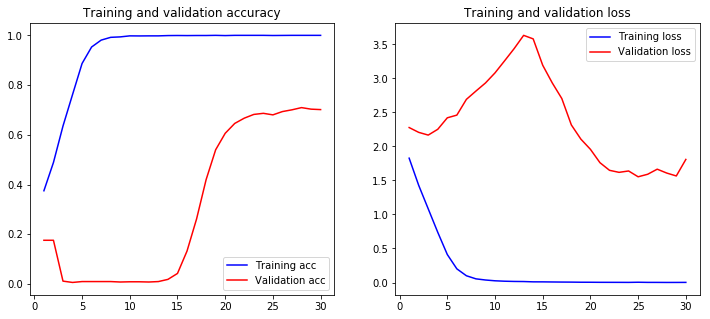

In [55]:
plot_history(history)